In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
csv_file_path = r'..\Data\GDP_growth\real-gdp-growth.csv'
df_gdp_rate_original = pd.read_csv(csv_file_path)
df_gdp_rate = df_gdp_rate_original.copy()
df_gdp_rate.rename(columns={'Entity': 'country', 'Gross domestic product, constant prices - Percent change - Observations' : 'gdp_change_%_observation', 'Gross domestic product, constant prices - Percent change - Forecasts' : 'gdp_change_%_forecast', 'Year' : 'year'}, inplace=True)
df_gdp_rate = df_gdp_rate.drop(columns=['gdp_change_%_forecast'])
df_gdp_rate['year'].unique()


array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2022, 2023,
       2024, 2025, 2026, 2027, 2028], dtype=int64)

In [8]:
csv_file_path = r'..\Data\Literacy\literacy-rate-adults.csv'
df_lit_original= pd.read_csv(csv_file_path)
df_lit = df_lit_original.copy()
df_lit = df_lit[df_lit['Year'] >= 1980]
df_lit = df_lit.drop(columns=['Code'] , errors='ignore')
df_lit.rename(columns={'Entity': 'country', 'Year' : 'year', 'Literacy rate, adult total (% of people ages 15 and above)' : 'literacy_rate_%'}, inplace=True)

In [9]:
merged_df = pd.merge(df_gdp_rate, df_lit, on=['country', 'year'], how='inner')
merged_df.head(10)

,country,Code,year,gdp_change_%_observation,literacy_rate_%
0,Afghanistan,AFG,2011,6.479,31.44885
1,Afghanistan,AFG,2021,-20.737,37.26604
2,Albania,ALB,2001,8.293,98.71298
3,Albania,ALB,2008,7.500,95.93864
4,Albania,ALB,2011,2.545,96.84530
5,Albania,ALB,2012,1.418,97.24697
6,Albania,ALB,2018,4.019,98.14115
7,Albania,ALB,2021,8.909,98.45000
8,Algeria,DZA,1987,-0.700,49.63088
9,Algeria,DZA,2002,5.600,69.87350


In [10]:
correlation = merged_df['gdp_change_%_observation'].corr(merged_df['literacy_rate_%'])
print(correlation)

-0.06777065521238773


                            OLS Regression Results                            
Dep. Variable:        literacy_rate_%   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.554
Date:                Wed, 06 Mar 2024   Prob (F-statistic):             0.0331
Time:                        11:11:29   Log-Likelihood:                -4368.6
No. Observations:                 989   AIC:                             8741.
Df Residuals:                     987   BIC:                             8751.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

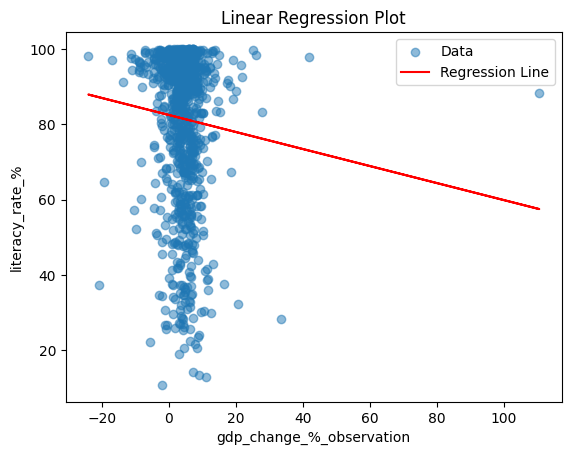

In [11]:
missing_values = merged_df.isnull().sum()
df_clean = merged_df.dropna()

X = df_clean['gdp_change_%_observation']
y = df_clean['literacy_rate_%']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.scatter(X['gdp_change_%_observation'], y, alpha=0.5, label='Data')
plt.plot(X['gdp_change_%_observation'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('gdp_change_%_observation')
plt.ylabel('literacy_rate_%')
plt.title('Linear Regression Plot')

plt.legend()
plt.show()

Overall, the results suggest that there is a statistically significant but weak inverse relationship between GDP change and literacy rate. However, the small R-squared value indicates that the model does not explain much of the variation in literacy rate, and other factors may be at play. 

In [12]:
merged_df.describe()

,year,gdp_change_%_observation,literacy_rate_%
count,995.000000,989.000000,995.000000
mean,2008.228141,4.126936,81.557678
std,10.349293,6.033041,20.058617
min,1980.000000,-23.983000,10.894650
25%,2002.000000,1.846000,72.256835
50%,2011.000000,4.035000,90.632990
75%,2016.000000,6.454000,96.193020
max,2021.000000,110.505000,100.000000


                            OLS Regression Results                            
Dep. Variable:        literacy_rate_%   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     10.74
Date:                Wed, 06 Mar 2024   Prob (F-statistic):            0.00109
Time:                        15:17:39   Log-Likelihood:                -4251.7
No. Observations:                 972   AIC:                             8507.
Df Residuals:                     970   BIC:                             8517.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

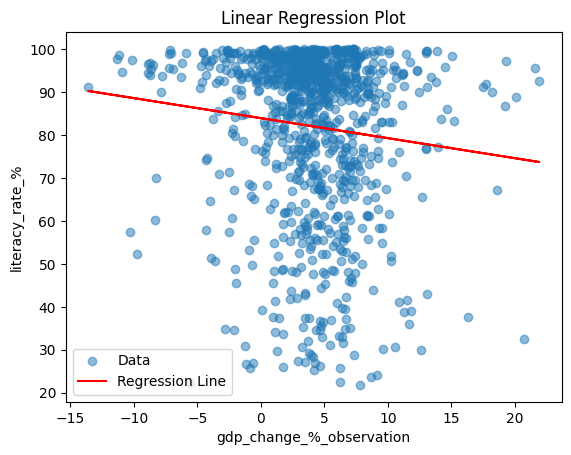

In [17]:
df_clean = merged_df.dropna()
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna()

#merged_df_no_missing = df_clean.dropna(subset=['gdp_change_%_observation'])
z_scores_gdp = stats.zscore(df_clean['gdp_change_%_observation'])
z_scores_lit = stats.zscore(df_clean['literacy_rate_%'])
threshold = 3

merged_df_no_extreme = df_clean[(abs(z_scores_gdp) < threshold) & (abs(z_scores_lit) < threshold)]

X = merged_df_no_extreme['gdp_change_%_observation']
y = merged_df_no_extreme['literacy_rate_%']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.scatter(X['gdp_change_%_observation'], y, alpha=0.5, label='Data')
plt.plot(X['gdp_change_%_observation'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('gdp_change_%_observation')
plt.ylabel('literacy_rate_%')
plt.title('Linear Regression Plot')

plt.legend()
plt.show()

In [18]:
correlation = merged_df_no_extreme['gdp_change_%_observation'].corr(merged_df_no_extreme['literacy_rate_%'])
print(correlation)

-0.10464329540379795
